# Contents

>[Business Understanding](#scrollTo=lIPXZlouX1s2)

>[Data Import](#scrollTo=ydXyxcRTX1nU)

>[Exploratory Data Analysis and Data Cleaning](#scrollTo=NkXlQYoi2oZC)

>>[Data imbalance](#scrollTo=k6D-9GCK1DE-)

>>[Null Values](#scrollTo=2lSK6VTXcNme)

>>>[Categorical Columns Analysis](#scrollTo=oMuVmyiV_7HP)

>>>[Missing value handling](#scrollTo=z6vn1PJEZPl8)

>>>[Other Data Cleaning](#scrollTo=uWJafmn50vC8)

>[Visualizations](#scrollTo=S7PsjDb6Arxa)

>>[Univariate Categorical Variables](#scrollTo=-VzvJDO32vyC)

>>[Categorical Variables with Target](#scrollTo=isIYlfMf25B1)

>>[Numeric Variables Visualizations](#scrollTo=7FBiZXkR2zdA)

>>[Numeric Variables with Target](#scrollTo=gw4Vorqv2-OH)

>[Data Preprocessing](#scrollTo=oONyk-O6X1hu)

>>[One-Hot Encoding: Categorical Columns](#scrollTo=-BEmLFh0efDx)

>>[Correlation Heatmap](#scrollTo=aaQcPXZQl0H_)

>>[Train-Test Split](#scrollTo=YnjIAPCHljl1)

>>[Feature Scaling](#scrollTo=RmxRxUQ6mYqg)

>[Feature Selection](#scrollTo=XW3_m2SzX1hM)

>>[Coarse Selection using RFE](#scrollTo=nnGVthIAoqBE)

>>[Refined Selection Manually](#scrollTo=ay4qwetcrJJU)

>[Final Model](#scrollTo=2GC_dLk6X0z-)

>[Model Evaluation](#scrollTo=Y1eeudkkX0fP)

>>[Identifying Ideal Probability Cutoff](#scrollTo=EETBYL8Y9Jhe)

>>[Updated Cutoff on Train Data and Lead Scores](#scrollTo=5SigtwIxRn6B)

>>[Updated Cutoff on Test Data and Lead Scores](#scrollTo=pb9uphq0R09E)

>[Conclusions and Remarks](#scrollTo=32aITcMbAgmr)



# Business Understanding

X Education is an edtech company that sells online courses to industry professionals. In this case study, we wish to give insights into addressing the problem of low lead conversion rates which is currently at 30%. Since the company gets a significant number of leads, we wish build a model that can identify "Hot Leads" who have a higher likelihood of conversion which means the marketing team can specifically target this subset instead of pursuing all leads blindly.

To achieve the company's target of identifying "Hot Leads" whose conversion rate is over 80%, one proposed solution is to use a supervised classification model which is trained and tested using historical data. We have been provided a `leads.csv` dataset which contains user information about various leads in the past and the target variable which is the tag about whether or not they have converted into a paying customer.

In [1]:
# Library imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# Setting display styles
sns.set(style="darkgrid")

#import pylab
#import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import precision_recall_curve

# Data Import

In [2]:
leads = pd.read_csv("Leads.csv")
print(leads.shape)
display(leads.head(3))

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [3]:
print(leads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
display(leads.describe())

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


We observe that the data contains 37 attributes for 9240 records. There are missing values in the dataset but the dependant variable doesn't have any missing values. Our first step would be to check for data imbalance and handle the columns with missing values on a case-by-case basis.

# Exploratory Data Analysis and Data Cleaning

## Data imbalance

In [5]:
print("Proportions of not-convered and converted leads in the dataset:")
print(leads.Converted.value_counts(normalize=True)*100)

Proportions of not-convered and converted leads in the dataset:
0    61.461039
1    38.538961
Name: Converted, dtype: float64


We observe a class imbalance in the data available to us. We need to be mindful of this situation while modelling and model interpretation since the built model may inherently be biased towards the majority class.

However, since the imbalance isn't so pronounce and drastic, we proceed with further analysis. We shall potentially consider other techniques such as using ensemble methods (like Random Forests) or specialized algorithms for oversampling such as SMOTE (Synthetic Minority Over-sampling Technique) at a later stage after evaluating the performance of a basic logistic regression model.

## Null Values

In [6]:
# Creating a DataFrame containing count and percent of null-values
leads_stats = pd.DataFrame({
    'Missing Percent': round(100 * leads.isnull().mean(), 2),
    'Missing Count': leads.isnull().sum(),
    'Data Type': leads.dtypes
})
# Sort the DataFrame by the Missing Percentage in descending order
leads_stats = leads_stats.sort_values(by='Missing Count', ascending=False)
display(leads_stats)

,Missing Percent,Missing Count,Data Type
Lead Quality,51.59,4767,object
Asymmetrique Activity Index,45.65,4218,object
Asymmetrique Profile Score,45.65,4218,float64
Asymmetrique Activity Score,45.65,4218,float64
Asymmetrique Profile Index,45.65,4218,object
Tags,36.29,3353,object
Lead Profile,29.32,2709,object
What matters most to you in choosing a course,29.32,2709,object
What is your current occupation,29.11,2690,object
Country,26.63,2461,object


We observe that the column `Lead Quality` has the most number of missing values at ~51% followed by four columns of scores based on customer profile and their activity each having ~46% missing values

We choose to drop columns with over 45% missing values.

In [7]:
# Dropping columns
cols_drop = list(leads_stats[leads_stats["Missing Percent"]>45].index)
leads.drop(cols_drop, axis=1, inplace=True)
print("Shape of the DataFrame after dropping columns with >45% nulls:", leads.shape)

Shape of the DataFrame after dropping columns with >45% nulls: (9240, 32)


### Categorical Columns Analysis
We have been warned that the missing values are not all in the form of nulls but also of the object type with some string input like "Unknown", "NULL", etc. Hence, we now explore the dataframe to handle those masked missing values.

In [8]:
# Unique value information
column_info = pd.DataFrame({
    'Column': leads.columns,
    'Unique Values': leads.nunique(),
    'Data Type': leads.dtypes
}).sort_values(by='Unique Values').reset_index(drop=True)

display(column_info)

,Column,Unique Values,Data Type
0,Receive More Updates About Our Courses,1,object
1,I agree to pay the amount through cheque,1,object
2,Magazine,1,object
3,Get updates on DM Content,1,object
4,Update me on Supply Chain Content,1,object
5,Newspaper Article,2,object
6,Search,2,object
7,A free copy of Mastering The Interview,2,object
8,Digital Advertisement,2,object
9,Through Recommendations,2,object


We observe that some of the columns have only one unique category which makes the information from these columns useless due to the lack of variation. Hence we drop these columns.

In [9]:
# Dropping columns
cols_drop = list(column_info[column_info["Unique Values"]==1]["Column"])
leads.drop(cols_drop, axis=1, inplace=True)
print("DataFrame dimensions after dropping categorical columns with only 1 category:", leads.shape)

DataFrame dimensions after dropping categorical columns with only 1 category: (9240, 27)


Dropping `Prospect ID` and `Lead Number` columns since they are not relevant for our analysis. They are randomly generated user identifiers.

In [10]:
leads.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)
print("DataFrame dimensions after dropping Prospect ID and Lead Number columns:", leads.shape)

DataFrame dimensions after dropping Prospect ID and Lead Number columns: (9240, 25)


Now we proceed to identifying missing values which are masked.

In [11]:
object_columns = leads.select_dtypes(include=['object']).columns.tolist()

print("Value count percentages for each categorical column:\n")

for col in object_columns:
    print(col)
    print(round(100*leads[col].value_counts(normalize = True)))
    print("\n")

Value count percentages for each categorical column:

Lead Origin
Landing Page Submission    53.0
API                        39.0
Lead Add Form               8.0
Lead Import                 1.0
Quick Add Form              0.0
Name: Lead Origin, dtype: float64


Lead Source
Google               31.0
Direct Traffic       28.0
Olark Chat           19.0
Organic Search       13.0
Reference             6.0
Welingak Website      2.0
Referral Sites        1.0
Facebook              1.0
bing                  0.0
google                0.0
Click2call            0.0
Press_Release         0.0
Social Media          0.0
Live Chat             0.0
youtubechannel        0.0
testone               0.0
Pay per Click Ads     0.0
welearnblog_Home      0.0
WeLearn               0.0
blog                  0.0
NC_EDM                0.0
Name: Lead Source, dtype: float64


Do Not Email
No     92.0
Yes     8.0
Name: Do Not Email, dtype: float64


Do Not Call
No     100.0
Yes      0.0
Name: Do Not Call, dtype: float6

We observe the following in the above printed value counts:
- `Do Not Email` column has 92% No and 8% Yes.
- `Do Not Call` column has ~100% No and ~0% Yes.
- `Country` column has 96% of leads from India and the rest 4% from 36 countries and or unknown.
- `Specialization` column has 25% values as "Select" which is equivalent to Null along with ~16% actual Nulls (as observed before)
- `How did you hear about X Education` column has 72% values as "Select" which is equivalent to Null.
- `What matters most to you in choosing a course` column has ~100% "Better Career Prospects" and ~0% values in the rest two categories of that column.
- `Search` column has ~100% No and ~0% Yes.
- `Newspaper Article` column has ~100% No and ~0% Yes.
- `X Education Forums` column has ~100% No and ~0% Yes.
- `Newspaper` column has ~100% No and ~0% Yes.
- `Digital Advertisement` column has ~100% No and ~0% Yes.
- `Through Recommendations` column has ~100% No and ~0% Yes.
- `Lead Profile` column has 63% values as "Select" which is equivalent to Null along with ~30% actual Nulls (as observed before).
- `City` column has 29% values as "Select" which is equivalent to Null along with ~15% actual Nulls (as observed before).

Hence all these columns need to be dropped either due to low variability (i.e., more than 90% records belonging to just one category) or because they have very high missing value percentage (in the form of "Select").

Dropping the above mentioned columns

In [12]:
cols_drop = [
    'Do Not Call',
    'Country',
    'Search',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Lead Profile',
    'City',
    'How did you hear about X Education',
    'What matters most to you in choosing a course',
    'Do Not Email'
]

leads.drop(cols_drop, axis=1, inplace=True)
print("DataFrame dimensions after dropping abovementioned columns:", leads.shape)

DataFrame dimensions after dropping abovementioned columns: (9240, 12)


Checking the final dataframe after initial cleaning:

In [13]:
display(leads.head(3))

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened


In [14]:
# Creating a DataFrame containing count and percent of null-values
leads_stats = pd.DataFrame({
    'Missing Percent': round(100 * leads.isnull().mean(), 2),
    'Missing Count': leads.isnull().sum(),
    'Unique Values': leads.nunique(),
    'Data Type': leads.dtypes
})
# Sort the DataFrame by the Missing Percentage in descending order
leads_stats = leads_stats.sort_values(by='Missing Count', ascending=False)
display(leads_stats)

,Missing Percent,Missing Count,Unique Values,Data Type
Tags,36.29,3353,26,object
What is your current occupation,29.11,2690,6,object
Specialization,15.56,1438,19,object
TotalVisits,1.48,137,41,float64
Page Views Per Visit,1.48,137,114,float64
Last Activity,1.11,103,17,object
Lead Source,0.39,36,21,object
Lead Origin,0.00,0,5,object
Converted,0.00,0,2,int64
Total Time Spent on Website,0.00,0,1731,int64


### Missing value handling

We now have 7 columns left with missing values. We add a category "Unknown" for missing values of the first three columns since they are categorical. We drop the missing values of rest of the columns because they are <2% of the total number of records.

In [15]:
cols = ["Tags", "What is your current occupation", "Specialization"]

for col in cols:
    leads[col].fillna("Unknown", inplace = True)

leads.loc[leads["Specialization"] == "Select", "Specialization"] = "Unknown"

leads.dropna(inplace = True)

### Other Data Cleaning

We now complete the data cleaning process by removing unnecessarily long column names.

In [16]:
# Assuming 'leads' is your DataFrame
leads.rename(columns={
    'Lead Origin': 'Origin',
    'Lead Source': 'Source',
    'Converted': 'Converted',
    'TotalVisits': 'Total Visits',
    'Total Time Spent on Website': 'Total Time',
    'Page Views Per Visit': 'Page Views Per Visit',
    'Last Activity': 'Last Activity',
    'Specialization': 'Specialization',
    'What is your current occupation': 'Current Occupation',
    'Tags': 'Tags',
    'A free copy of Mastering The Interview': 'Free Interview Copy',
    'Last Notable Activity': 'Last Notable Activity'
}, inplace=True)

# Display the first few rows of the DataFrame with the new column names
display(leads.head(3))


,Origin,Source,Converted,Total Visits,Total Time,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Tags,Free Interview Copy,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened


In [17]:
leads['Free Interview Copy'] = leads['Free Interview Copy'].map({'Yes': 1, 'No': 0})

In [18]:
# Creating a DataFrame containing count and percent of null-values
leads_stats = pd.DataFrame({
    'Missing Count': leads.isnull().sum(),
    'Unique Values': leads.nunique(),
    'Data Type': leads.dtypes
})
display(leads_stats)

,Missing Count,Unique Values,Data Type
Origin,0,4,object
Source,0,21,object
Converted,0,2,int64
Total Visits,0,41,float64
Total Time,0,1717,int64
Page Views Per Visit,0,114,float64
Last Activity,0,17,object
Specialization,0,19,object
Current Occupation,0,7,object
Tags,0,27,object


# Visualizations

In [19]:
cat_cols = ["Origin", "Source", "Last Activity", "Specialization",
            "Current Occupation", "Tags", "Free Interview Copy",
            "Last Notable Activity"]
num_cols = ["Total Visits", "Total Time", "Page Views Per Visit"]
target = "Converted"

## Univariate Categorical Variables

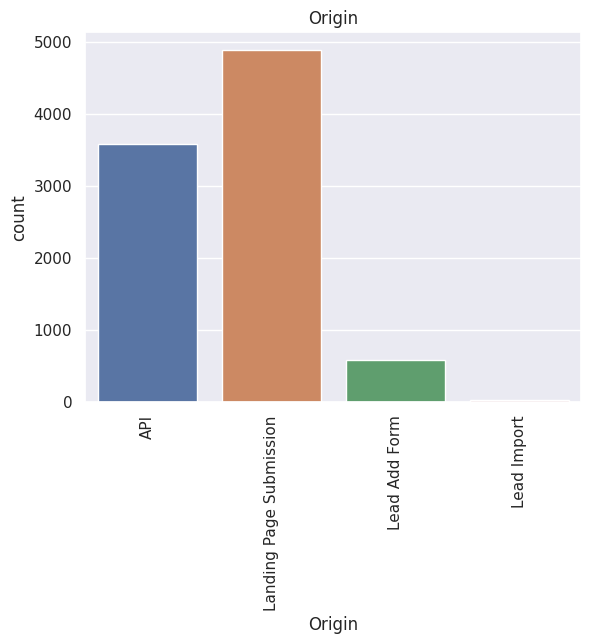

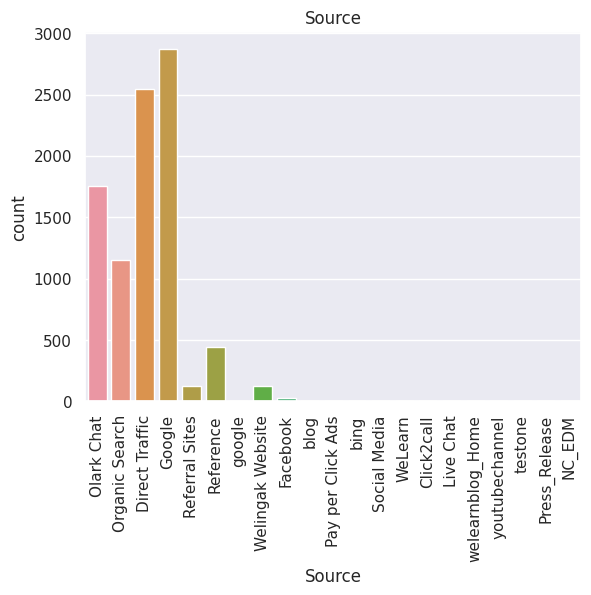

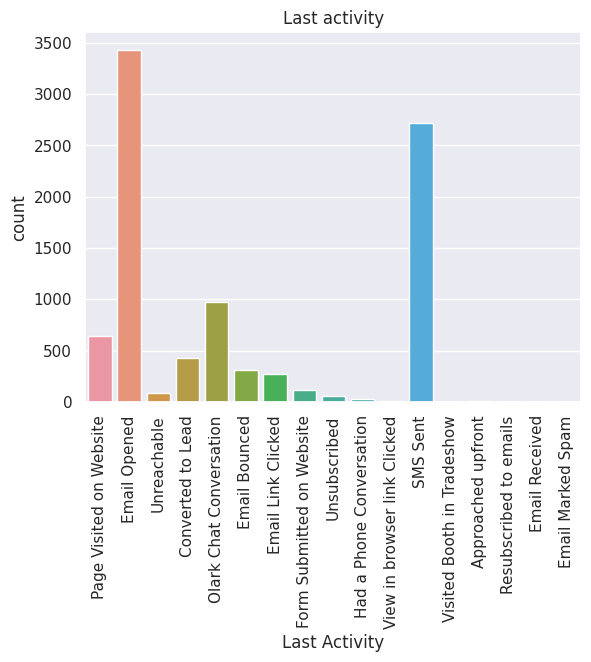

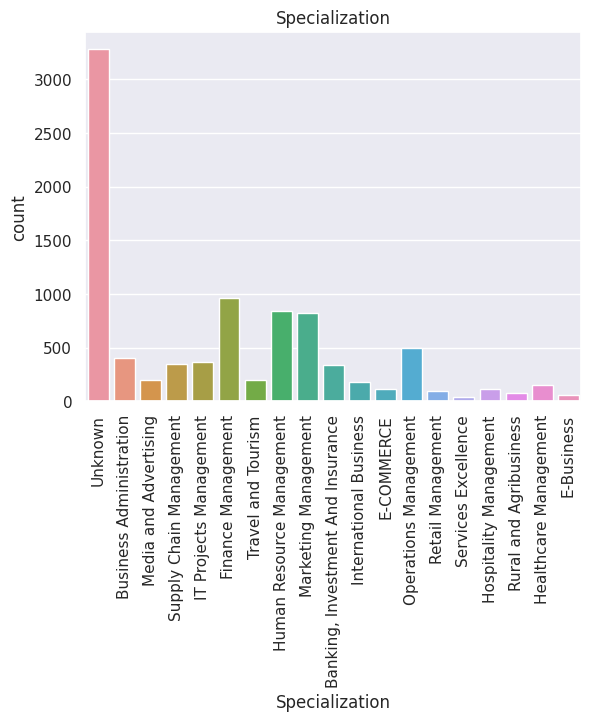

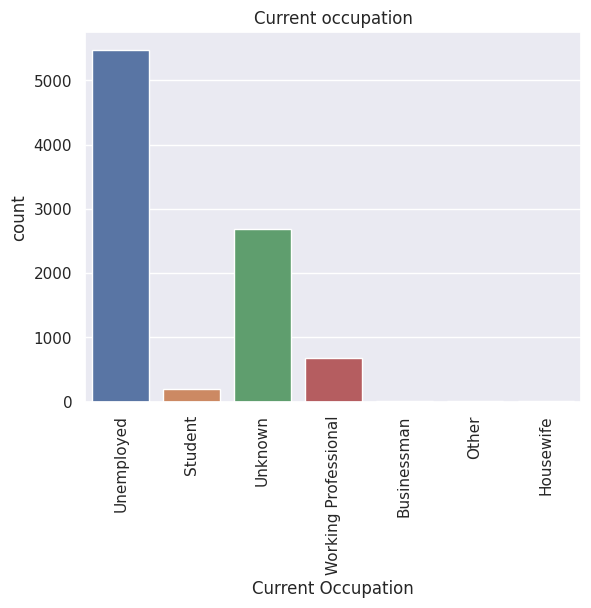

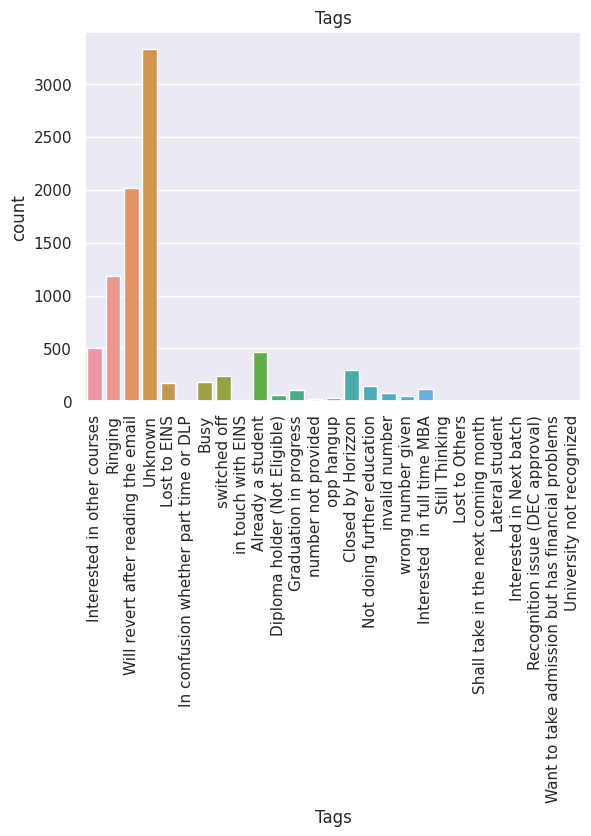

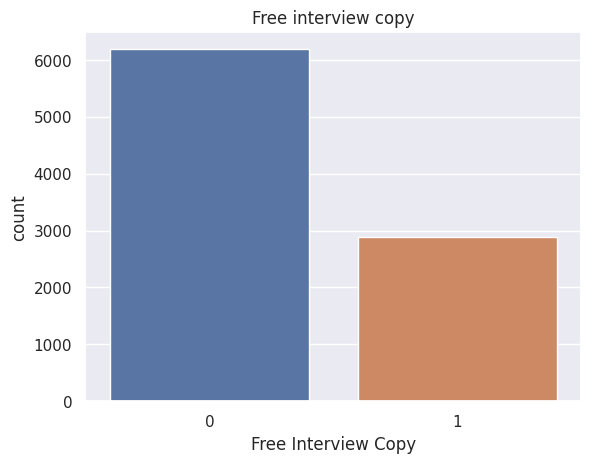

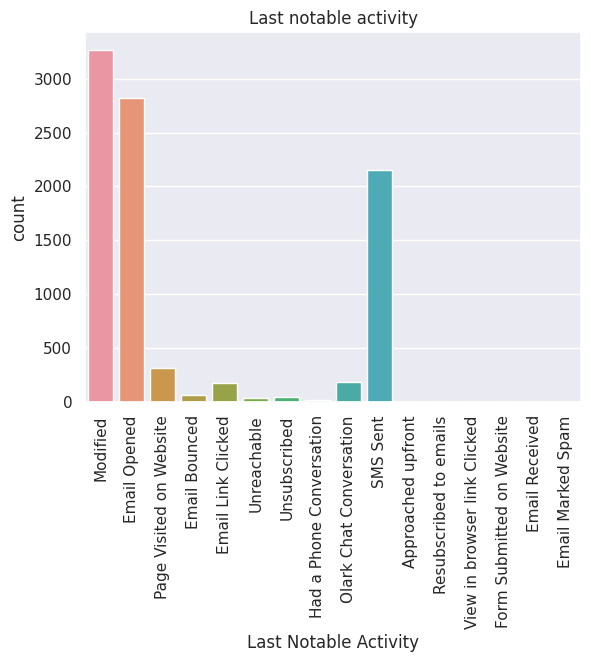

In [20]:
def uni_cat_cols(df, cat_cols):
    """
    Input : Dataframe and Categorical columns list
    Output: Displays univariate graphs of categorical columns
    """
    for col in cat_cols:
        sns.countplot(data=df, x=col)
        # Rotate xticks if the number of unique categories is greater than 3
        unique_categories = df[col].unique()
        if len(unique_categories) > 3:
            plt.xticks(rotation=90)
        plt.title(col.capitalize())
        plt.show()
        print("\n")

uni_cat_cols(leads, cat_cols)

Observations from the univariate categorical plots:

- Lead origin is from four different sources and maximumn number of leads are from "Landing Page Submission". "Lead Import" is almost non-existant.
- There are various sources for leads and most of them are from Google followed by Direct Trafic and Olark Chat.
- There are various possible categories for Last activity but the most common ones are "Email Opened" and "SMS Sent"
- Most leads haven't provided the information about their specialization choice. Among the ones who did provide that information, Finance Management, Human Resource Management, Marketing Management and Operations Management are the most common.
- The most common current profession for lead is "Unemployed". There are a significant portion of leads who don't share information about their current occupation.
- The Tags column contains information enterred by the marketting agent based on their conversation with the lead. The most common tag is that the lead will revert after reading the email.
- When asked about whether or not the lead wants to get a free copy to master interviews, almost 2/3rd of them replied no and a third of them replied yes.
- The last notable activity for most leads is "Modified", "Email Opened", or "SMS Sent".

## Categorical Variables with Target

In [21]:
print("Overall percentage of converted leads is:", round(100*leads[target].mean()),"%")

Overall percentage of converted leads is: 38 %


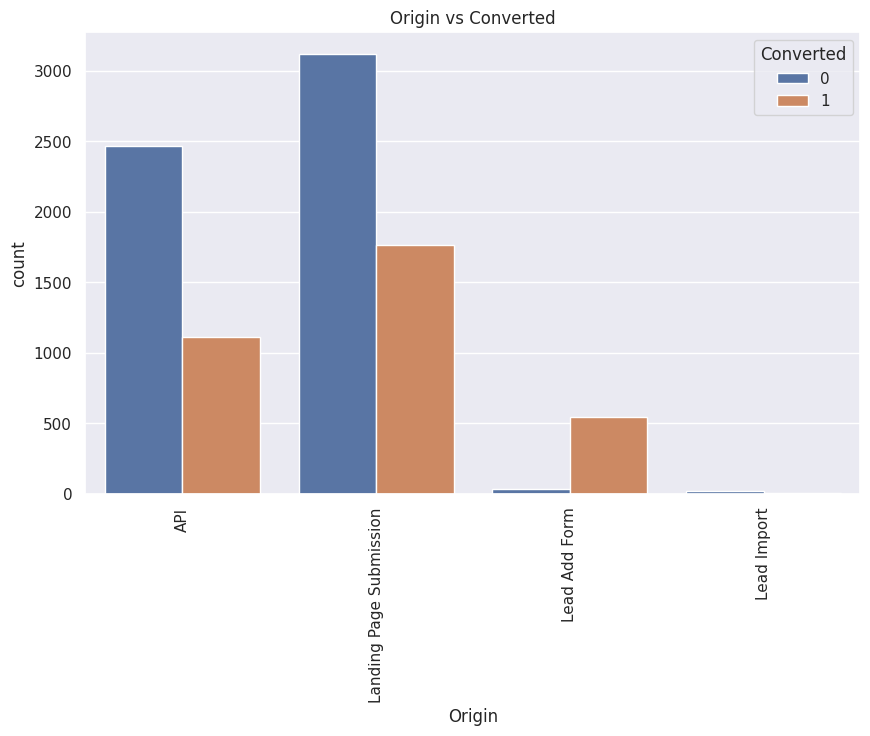

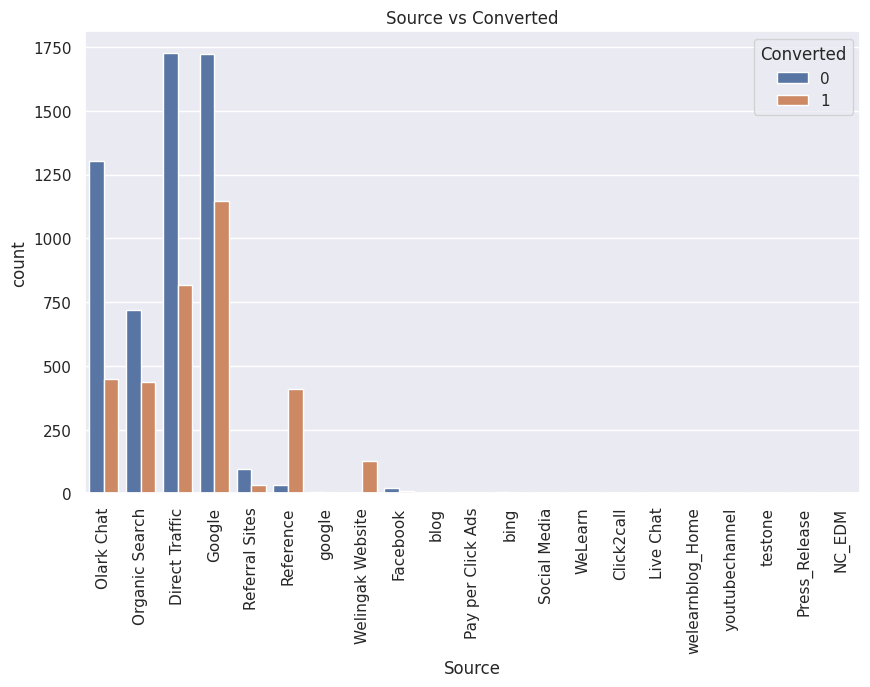

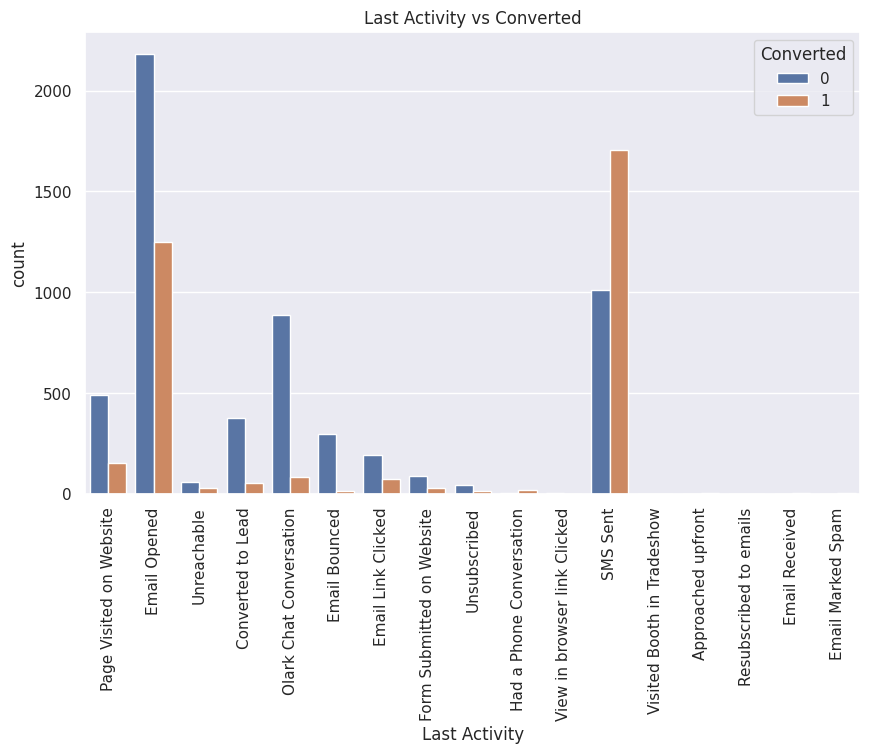

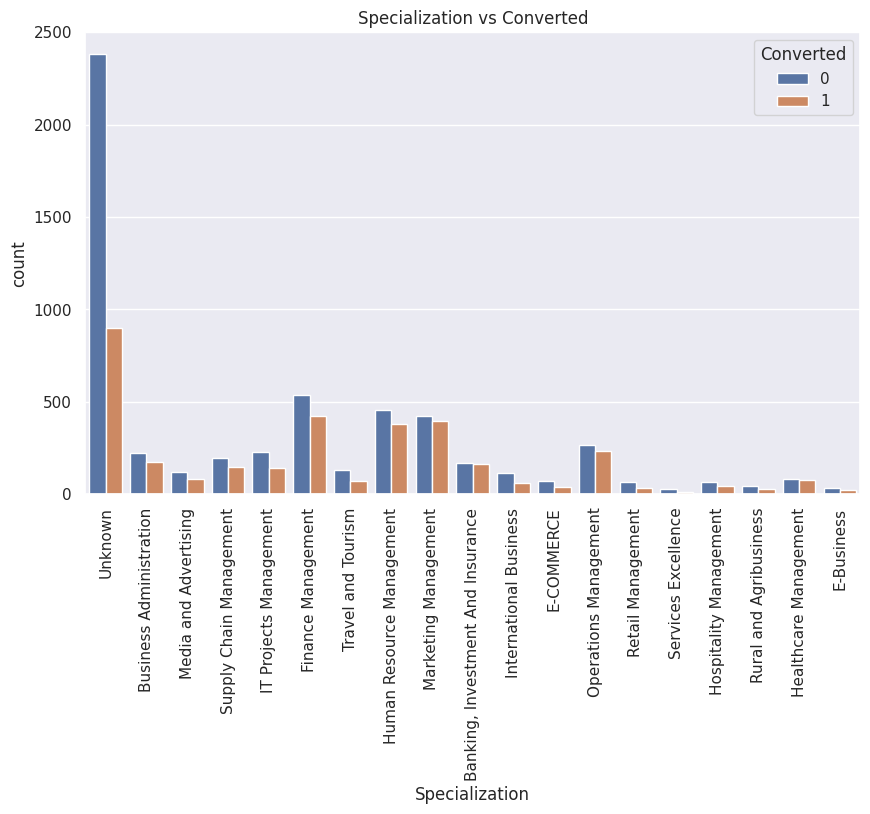

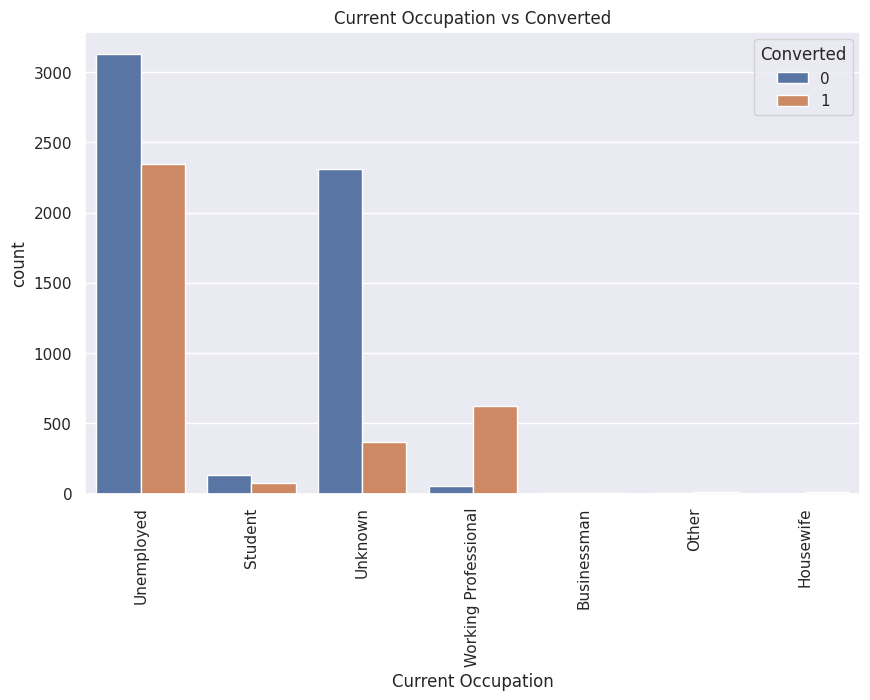

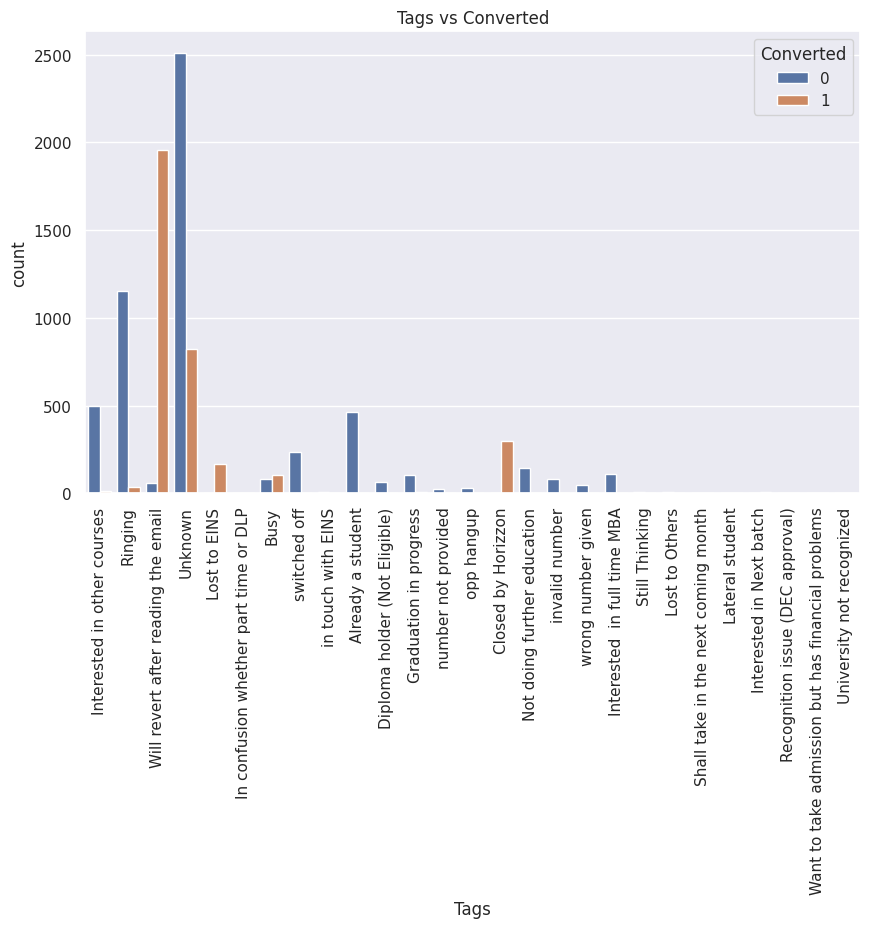

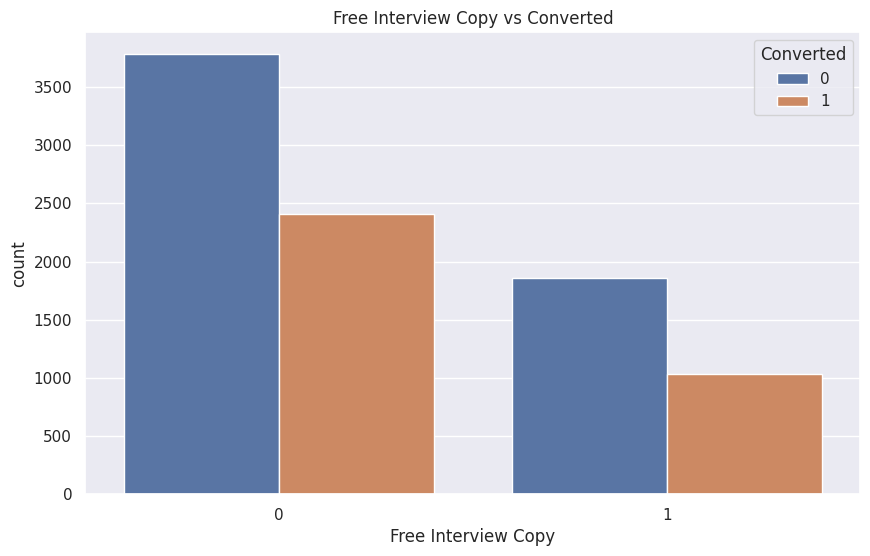

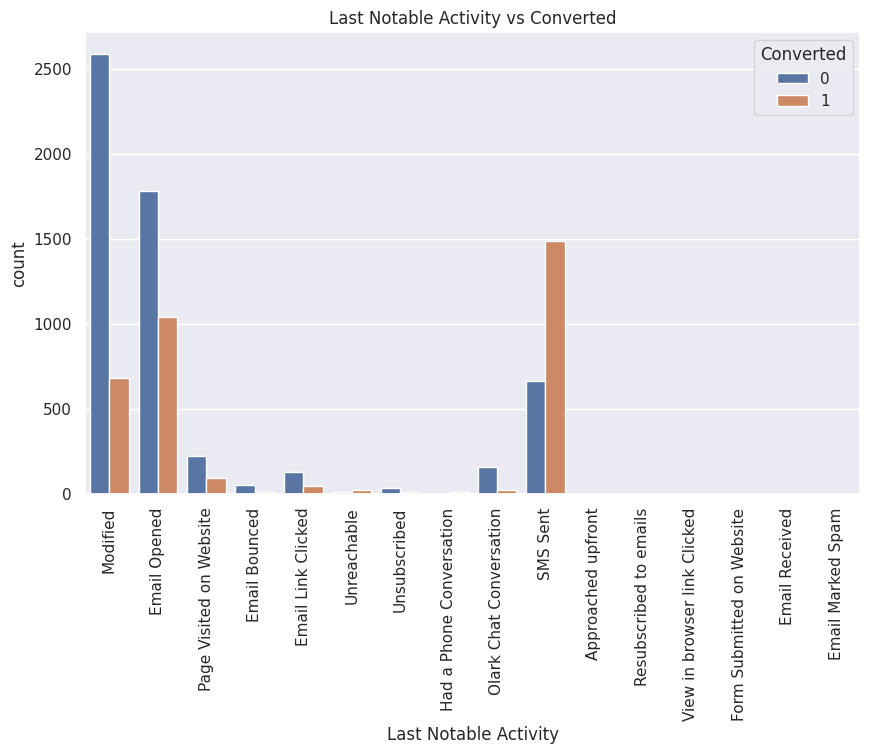

In [22]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=target, data=leads)
    plt.title(f'{col} vs {target}')
    unique_categories = leads[col].unique()
    if len(unique_categories) > 3:
            plt.xticks(rotation=90)
    plt.show()
    print("\n")

The percentage of converted leads across the entire dataset is 38%, i.e., more leads were not converted than converted. Observations from the categorical plots that differ from this is:

- All categories of lead orgin except "Lead Add Form" show lower percentage of converted leads than the not converted leads as expected. Leads from "Lead Add Form" origin have higher conversion rates.
- Leads having sources as "Reference" and "Wellingak Website" have higher percentage of lead conversions than non-conversions.
- Leads with last activity as "SMS Sent" have higher percentage of lead conversions.
- Leads with Unknown specialization have much lower percentage of conversion as compared to the rest of the specializations.
- Leads whose current occupation is "Working Professional" have higher percentage of converted leads than the rest of the categories.
- Leads with Tags marked as "Will revert after reading the email" and "Closed by Horizon" have higher percentage of lead conversions.
- Leads whose last notable activity is "SMS Sent" have higher percentage of lead conversions.

## Numeric Variables Visualizations

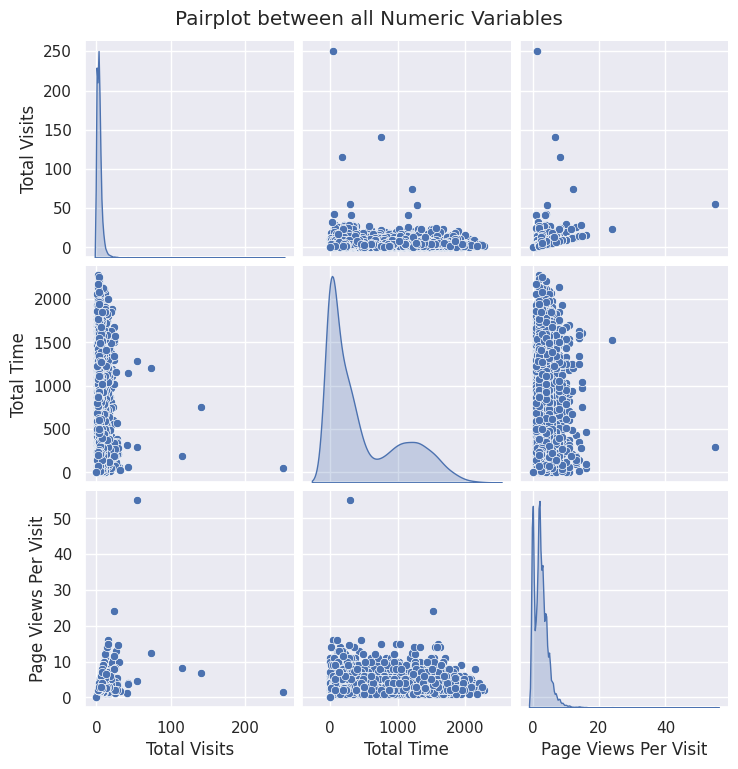

In [23]:
def num_pairplot(df, num_cols):
    """
    Given the dataframe and numeric column list,
    this function plots a pairplot using sns library.
    Input : Dataframe, numeric columns list
    Output: Displays the final pairplot
    """
    g = sns.pairplot(data=df[num_cols], diag_kind='kde')
    g.fig.suptitle("Pairplot between all Numeric Variables", y=1.02)
    plt.show()

num_pairplot(leads, num_cols)

The pairplot from seaborn library gives us both univariate distributions and bivariate scatter plots at the same time. Following are the observations from Numeric variables plots:

- Total visits column has outliers and is extremely right skewed.
- Total time spent on a webpage column exhibits bimodal distribution with a taller peak at shorter times and a shorter peak at longer times.
- Page views per visit also has outliers and is right skewed.
- the scatter plots between all the pairs of variabes show outliers.

## Numeric Variables with Target

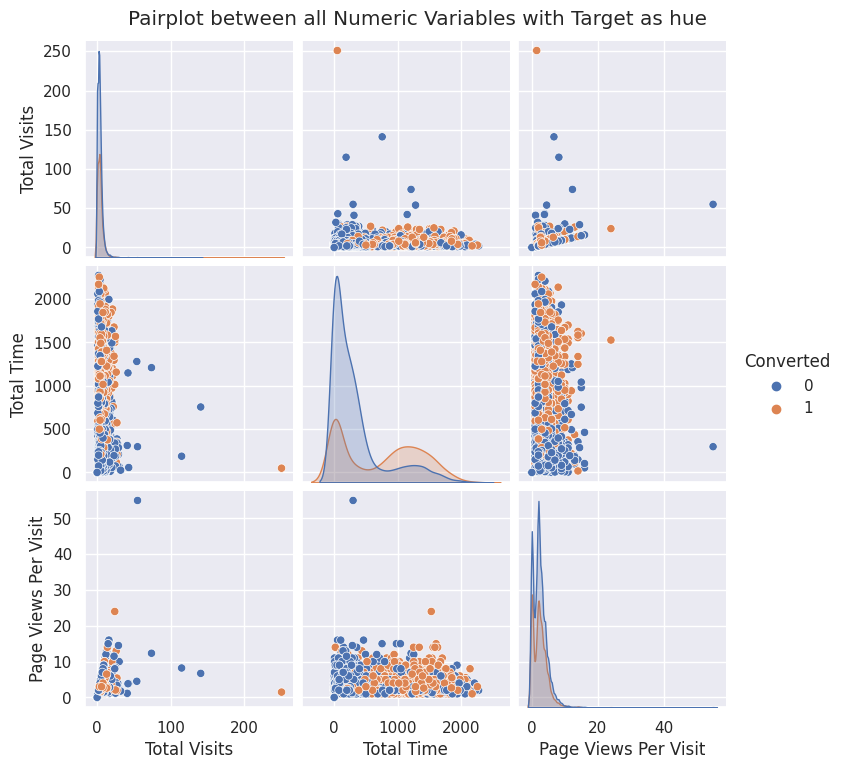

In [24]:
def num_pairplot_target(df, num_cols, target):
    """
    Given the dataframe and numeric column list,
    this function plots a pairplot using sns library.
    Input : Dataframe, numeric columns list, categorical target column
    Output: Displays the final pairplot
    """
    g = sns.pairplot(data=df[num_cols+[target]], diag_kind='kde' , hue = target)
    g.fig.suptitle("Pairplot between all Numeric Variables with Target as hue", y=1.02)
    plt.show()

num_pairplot_target(leads, num_cols, target)

Insights from the pair plot with target variable as hue:
- There isn't much difference in the distributions of converted and not converted leads in terms of "Total Visits" and "Page Views Per Visit".
- Leads who spent longer time on the website seem to show higher conversion rates as per their distribution.

# Data Preprocessing

## One-Hot Encoding: Categorical Columns

In [25]:
def create_dummies(df, cat_cols):
    """
    Input : Dataframe
    Output: Creates dummy variables of non-binary categorical columns from the dataframe
    """
    display(df.head(3))
    print("Initial shape of the dataframe is:", df.shape)
    dummy = pd.get_dummies(df[cat_cols], drop_first=True)
    dummy = dummy.astype(int)
    df = pd.concat([df, dummy], axis=1)
    df = df.drop(cat_cols, axis=1)
    print("Dataframe shape after adding dummy variables and dropping original columns is:", df.shape)
    display(df.head(3))
    return df

# Example usage
leads = create_dummies(leads, cat_cols)

,Origin,Source,Converted,Total Visits,Total Time,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Tags,Free Interview Copy,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened


Initial shape of the dataframe is: (9074, 12)
Dataframe shape after adding dummy variables and dropping original columns is: (9074, 108)


,Converted,Total Visits,Total Time,Page Views Per Visit,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Correlation Heatmap

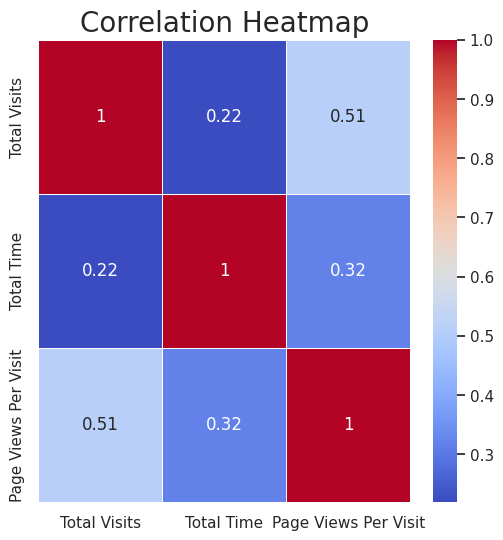

In [26]:
def heatmap(df, size):
    """
    Input : Dataframe and the size of the heatmap figure
    Output: Displays the heatmap of correlations in the dataframe
    """
    plt.figure(figsize=(size, size))
    sns.heatmap(
        data = round(df.corr(),2),
        cmap = 'coolwarm',
        linewidth = 0.5,
        annot = True
    )
    plt.title("Correlation Heatmap", fontsize = 20)
    plt.show()

# Correlation Heatmap of numerical variables
heatmap(leads[num_cols], 6)

We don't observe any instances of high correlation among numerical variables.

## Train-Test Split

Train test split is done in 70-30 ratio with `random_state` = 42 for reproducibility of results.



In [27]:
leads_train, leads_test = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state = 42)
print("Shape of the training dataset is:", leads_train.shape)
print("Shape of the test dataset is:", leads_test.shape)

Shape of the training dataset is: (6351, 108)
Shape of the test dataset is: (2723, 108)


## Feature Scaling
Min-Max scaling is done using the inbuilt `MinMaxScaler()` from `sklearn.preprocessing`.

In [28]:
def min_max_scaling(df_train, df_test, num_cols):
    """
    Input : Training dataset, Test Dataset, Numeric columns list
    Output: Scaled train and test dataset
    """
    scaler = MinMaxScaler()
    df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
    df_test[num_cols] = scaler.transform(df_test[num_cols])
    print("Describe numeric columns of training data:")
    display(df_train[num_cols].describe())
    print("Describe numeric columns of test data:")
    display(df_test[num_cols].describe())
    return df_train, df_test

# Feature scaling using the Fit_transform and transfrom methods for train and test data
leads_train, leads_test = min_max_scaling(leads_train, leads_test, num_cols)

Describe numeric columns of training data:


,Total Visits,Total Time,Page Views Per Visit
count,6351.000000,6351.000000,6351.000000
mean,0.013738,0.216432,0.043068
std,0.018937,0.242568,0.039669
min,0.000000,0.000000,0.000000
25%,0.003984,0.006436,0.018182
50%,0.011952,0.110963,0.036364
75%,0.019920,0.411229,0.054545
max,1.000000,1.000000,1.000000


Describe numeric columns of test data:


,Total Visits,Total Time,Page Views Per Visit
count,2723.000000,2723.000000,2723.000000
mean,0.013843,0.209431,0.043154
std,0.020309,0.240689,0.038393
min,0.000000,0.000000,0.000000
25%,0.003984,0.001332,0.018182
50%,0.011952,0.104749,0.036364
75%,0.019920,0.402796,0.063636
max,0.561753,1.008433,0.272727


In [29]:
def X_y_split(df_train, df_test, target):
    """
    Input : Train and Test Dataframes
    Output: X_train, y_train, X_test and y_test
    """
    y_train = df_train.pop(target)
    X_train = df_train
    y_test = df_test.pop(target)
    X_test = df_test
    return X_train, y_train, X_test, y_test

# Creating X_train, y_train, X_test and y_test from scaled features
X_train, y_train, X_test, y_test = X_y_split(leads_train, leads_test, target)

# Feature Selection

**In this section, we perform feature selection in two steps:**
1. Coarse selection of features using Recursive Feature Elimination (RFE) algorithm
2. Refine the initial selection to get a set of ~10 features for the final model

## Coarse Selection using RFE

In [30]:
def rfe_select(X_train, y_trin, n):
    """
    Input : training data frame and number of features to choose
    Output: prints RFE support and ranking for each column and returns list of chosen columns
    """
    # Running RFE with the output number of the variable equal to 10
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)

    rfe = RFE(estimator = logreg, n_features_to_select = n)        # running RFE
    rfe = rfe.fit(X_train, y_train)
    display(pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_)))
    print("Selected columns are:")
    print(list(X_train.columns[rfe.support_]))
    return list(X_train.columns[rfe.support_])

# Performing RFE selection
cols_rfe = rfe_select(X_train, y_train, 15)

,0,1,2
0,Total Visits,False,7
1,Total Time,True,1
2,Page Views Per Visit,False,80
3,Origin_Landing Page Submission,False,27
4,Origin_Lead Add Form,False,3
...,...,...,...
102,Last Notable Activity_Resubscribed to emails,False,92
103,Last Notable Activity_SMS Sent,False,10
104,Last Notable Activity_Unreachable,False,22
105,Last Notable Activity_Unsubscribed,False,87


Selected columns are:
['Total Time', 'Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Current Occupation_Unknown', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Last Notable Activity_Modified']


## Refined Selection Manually
We now build a first model with RFE chosen features using `statsmodels.api` to get detailed statistics. We will then refine it by dropping features based on p-values and VIF following the below mentioned criteria:
1. Drop features with high p-value and high VIF
2. Drop features with high p-value and acceptable VIF
3. Drop features with acceptable p-value and high VIF
4. Keep the remaining features for the final model

**Note:** We choose the level of significance for a coefficient to be $\alpha = 0.05$ and the maximum tolerable VIF $= 5$. We tolerate VIF $\in [5,6]$ if the variable is important as per our understanding.

In [31]:
def build_model_sm(X_train, y_train, cols):
    """
    Input : X and y training data and the columns from X_train to use for the model
    Output: prints the summary of the model built using Statsmodels (doesn't return model)
            displays VIF for for the chosen features
    """
    X_train = X_train[cols]
    X_train1 = sm.add_constant(X_train)
    logreg = sm.GLM(y_train, X_train1, family = sm.families.Binomial()).fit()
    print(logreg.summary())

    # VIF
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [32]:
# Building first model using RFE selected features
build_model_sm(X_train, y_train, cols_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.3
Date:                Tue, 21 Nov 2023   Deviance:                       2172.7
Time:                        08:15:13   Pearson chi2:                 1.03e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6246
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,Features,VIF
10,Tags_Unknown,5.25
4,Current Occupation_Unknown,4.76
0,Total Time,1.88
11,Tags_Will revert after reading the email,1.73
3,Last Activity_SMS Sent,1.66
14,Last Notable Activity_Modified,1.45
9,Tags_Ringing,1.17
1,Source_Welingak Website,1.14
8,Tags_Lost to EINS,1.09
2,Last Activity_Email Bounced,1.08


We drop the "Tags_Lateral student" column because p-value for its coefficient is 1 >> 0.05 which is our chosen $\alpha$.

In [33]:
chosen_cols = [col for col in cols_rfe if col!="Tags_Lateral student"]
build_model_sm(X_train, y_train, chosen_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1094.7
Date:                Tue, 21 Nov 2023   Deviance:                       2189.5
Time:                        08:15:14   Pearson chi2:                 1.03e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6236
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,Features,VIF
9,Tags_Unknown,5.25
4,Current Occupation_Unknown,4.76
0,Total Time,1.88
10,Tags_Will revert after reading the email,1.73
3,Last Activity_SMS Sent,1.65
13,Last Notable Activity_Modified,1.45
8,Tags_Ringing,1.17
1,Source_Welingak Website,1.14
7,Tags_Lost to EINS,1.09
2,Last Activity_Email Bounced,1.08


We drop the "Tags_invalid number" column because p-value for its coefficient is 0.999 >> 0.05 which is our chosen $\alpha$.

In [34]:
chosen_cols = [col for col in chosen_cols if col!="Tags_invalid number"]
build_model_sm(X_train, y_train, chosen_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1098.6
Date:                Tue, 21 Nov 2023   Deviance:                       2197.2
Time:                        08:15:14   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6232
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,Features,VIF
9,Tags_Unknown,5.24
4,Current Occupation_Unknown,4.76
0,Total Time,1.87
10,Tags_Will revert after reading the email,1.72
3,Last Activity_SMS Sent,1.64
12,Last Notable Activity_Modified,1.44
8,Tags_Ringing,1.17
1,Source_Welingak Website,1.14
7,Tags_Lost to EINS,1.09
2,Last Activity_Email Bounced,1.08


Now all the p-values are in the acceptable range. We drop the "Tags_Unknown" column because its VIF score is 5.24 which is greater than 5 which was our chosen cutoff.

In [35]:
chosen_cols = [col for col in chosen_cols if col!="Tags_Unknown"]
build_model_sm(X_train, y_train, chosen_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1331.6
Date:                Tue, 21 Nov 2023   Deviance:                       2663.2
Time:                        08:15:15   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5945
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,Features,VIF
0,Total Time,1.80
9,Tags_Will revert after reading the email,1.65
3,Last Activity_SMS Sent,1.58
11,Last Notable Activity_Modified,1.44
4,Current Occupation_Unknown,1.36
8,Tags_Ringing,1.16
2,Last Activity_Email Bounced,1.08
6,Tags_Closed by Horizzon,1.07
5,Tags_Busy,1.06
7,Tags_Lost to EINS,1.05


We drop the "Tags_Busy" column because its p-value increased to 0.048. It is still less than $\alpha$ but we observe that there is no significant difference in final model performance when we drop this column, hence dropping this column will be preferred since we always strive for a simpler model with comparable performance.

In [36]:
chosen_cols = [col for col in chosen_cols if col!="Tags_Busy"]
build_model_sm(X_train, y_train, chosen_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.6
Date:                Tue, 21 Nov 2023   Deviance:                       2667.2
Time:                        08:15:15   Pearson chi2:                 9.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5942
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,Features,VIF
0,Total Time,1.75
8,Tags_Will revert after reading the email,1.61
3,Last Activity_SMS Sent,1.54
10,Last Notable Activity_Modified,1.43
4,Current Occupation_Unknown,1.35
7,Tags_Ringing,1.15
2,Last Activity_Email Bounced,1.08
5,Tags_Closed by Horizzon,1.07
6,Tags_Lost to EINS,1.05
9,Tags_switched off,1.04


Now the coefficients for all our variables have p-values satisfying our acceptable significance level and we also have no issue of multi-collinearity as indicated by the Variance Inflation Factor. Hence these variables are chosen and accepted to be in the final model. We now proceed to building our final model.

# Final Model

In [37]:
print(f"We chose {len(chosen_cols)} columns for the final model and they are:")
display(chosen_cols)

We chose 11 columns for the final model and they are:


['Total Time',
 'Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_SMS Sent',
 'Current Occupation_Unknown',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Last Notable Activity_Modified']

In [38]:
final_model = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial()).fit()
print(final_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.6
Date:                Tue, 21 Nov 2023   Deviance:                       2667.2
Time:                        08:15:15   Pearson chi2:                 9.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5942
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Model Evaluation

In this section, we first use $cutoff = 0.5$ to determine the class labels and see the model performance. We then proceed to update the cutoff based on the sensitivity-specificity tradeoff and precision-recall tradeoff to get our final probability cutoff based on which we will evaluate model performance on both train and test data.

## Identifying Ideal Probability Cutoff

In [39]:
def model_pred(model, X, y, cutoff = 0.5):
    """
    Generate predictions using a logistic regression model and display the results.

    Parameters:
    - model: The logistic regression model for prediction.
    - X: The input features for prediction.
    - y: The true labels.
    - cutoff: The threshold for classification (default is 0.5).

    Returns:
    - predictions: DataFrame containing actual conversion flags, predicted probabilities, and binary predictions.
    """

    # Use 'predict' to predict the probabilities on the train set
    y_prob = model.predict(sm.add_constant(X))

    #Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
    predictions = pd.DataFrame({'Converted':y.values, 'Conversion_Prob':y_prob})
    predictions['Predicted'] = predictions.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
    display(predictions.head(3))
    return predictions

y_train_pred = model_pred(final_model, X_train[chosen_cols], y_train, cutoff = 0.5)

,Converted,Conversion_Prob,Predicted
1943,0,0.028322,0
456,0,0.010676,0
6547,0,0.053058,0


In [40]:
def logreg_metrics(model, X, y, cutoff = 0.5):
    """
    Evaluate logistic regression model performance and display metrics.

    Parameters:
    - model: The logistic regression model to evaluate.
    - X: The input features for prediction.
    - y: The true labels.
    - cutoff: The threshold for classification (default is 0.5).

    Returns:
    - confusion_matrix: DataFrame containing the confusion matrix.
    - model_metrics: DataFrame containing accuracy, sensitivity, specificity, precision, recall, and f1_score.
    """

    y_prob = model.predict(sm.add_constant(X))
    y_pred = y_prob.map(lambda x: 1 if x > cutoff else 0)

    confusion = metrics.confusion_matrix(y, y_pred)
    confusion_matrix = pd.DataFrame(confusion, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy = round((TP+TN)/(TP+TN+FP+FN), 4)
    sensitivity = round(TP/(TP+FN), 4)
    specificity  = round(TN/(TN+FP), 4)
    precision = round(TP/(TP+FP), 4)
    recall = round(TP/(TP+FN), 4)
    f1_score = round(metrics.f1_score(y, y_pred), 4)


    d = {
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score'],
        'Value': [accuracy, sensitivity, specificity, precision, recall, f1_score],
    }
    model_metrics = pd.DataFrame(d)

    # Display confusion matrix and model metrics
    print("Confusion matrix:")
    display(confusion_matrix)
    print("\nModel Evaluation Metrics:")
    display(model_metrics)
    return confusion_matrix, model_metrics


confusion_matrix, model_metrics = logreg_metrics(final_model, X_train[chosen_cols], y_train, cutoff = 0.5)

Confusion matrix:


,Predicted 0,Predicted 1
Actual 0,3801,176
Actual 1,334,2040



Model Evaluation Metrics:


,Metric,Value
0,Accuracy,0.9197
1,Sensitivity,0.8593
2,Specificity,0.9557
3,Precision,0.9206
4,Recall,0.8593
5,F1 Score,0.8889


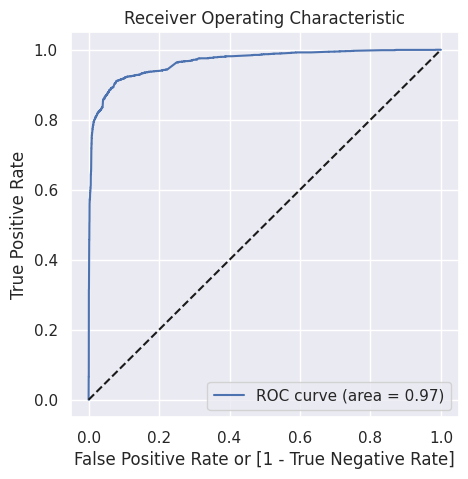

In [41]:
def draw_roc( actual, probs ):
    """
    Draw a Receiver Operating Characteristic (ROC) curve.

    Parameters:
    - actual: The actual binary labels.
    - probs: The predicted probabilities.

    Returns:
    - None (plots the ROC curve).
    """

    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

draw_roc(y_train_pred.Converted, y_train_pred.Conversion_Prob)

In [42]:
def add_cutoff_columns(df, cutoffs):
    """
    Add columns with binary predictions based on different probability cutoffs.

    Parameters:
    - df: DataFrame with 'Conversion_Prob' column for predicted probabilities.
    - cutoffs: List of probability cutoff values.

    Returns:
    - df: DataFrame with additional columns for each cutoff.
    """

    for cutoff in cutoffs:
        column_name = cutoff
        df[column_name] = df['Conversion_Prob'].map(lambda x: 1 if x > cutoff else 0)
    display(df.head(3))
    return df

cutoffs = [float(x)/10 for x in range(11)]
y_train_pred_final = add_cutoff_columns(y_train_pred, cutoffs)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1943,0,0.028322,0,1,0,0,0,0,0,0,0,0,0,0
456,0,0.010676,0,1,0,0,0,0,0,0,0,0,0,0
6547,0,0.053058,0,1,0,0,0,0,0,0,0,0,0,0


,prob,accuracy,sensi,speci
0.0,0.0,0.373799,1.000000,0.000000
0.1,0.1,0.821131,0.965880,0.734725
0.2,0.2,0.897182,0.924179,0.881066
0.3,0.3,0.916706,0.908593,0.921549
0.4,0.4,0.919540,0.877001,0.944933
0.5,0.5,0.919698,0.859309,0.955746
0.6,0.6,0.915446,0.823083,0.970581
0.7,0.7,0.914659,0.802443,0.981644
0.8,0.8,0.907889,0.771693,0.989188
0.9,0.9,0.892930,0.727043,0.991954


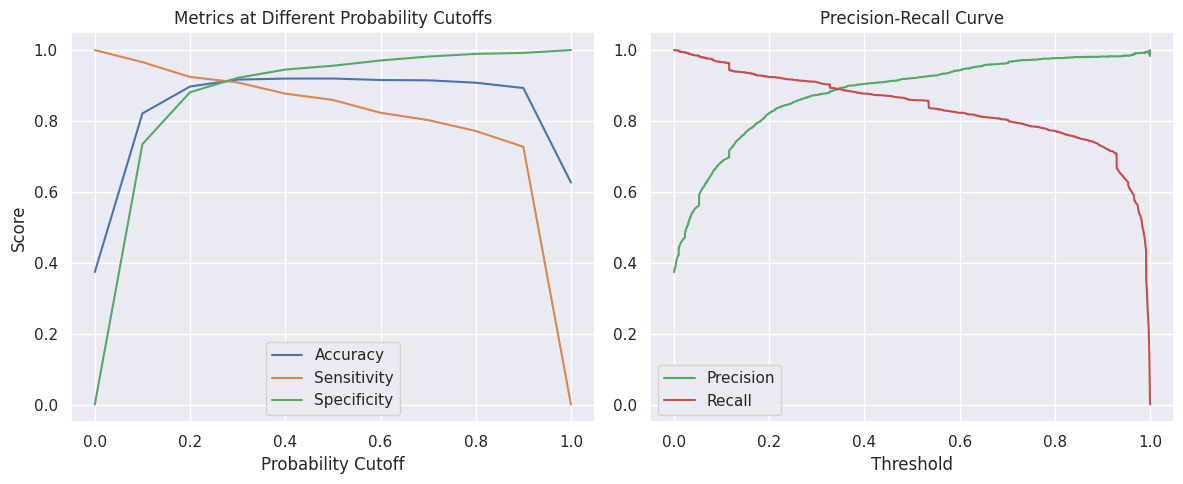

In [43]:
def plot_ssa_pr_curve(y_train_pred_final, cutoffs):
    """
    Plot metrics (accuracy, sensitivity, specificity) and precision-recall curve at different probability cutoffs.

    Parameters:
    - y_train_pred_final: DataFrame with 'Converted', 'Conversion_Prob', and additional columns for each cutoff.
    - cutoffs: List of probability cutoff values.

    Returns:
    - cutoff_df: DataFrame with values of accuracy, sensitivity, and specificity at different probability cutoffs.
    """

    # Create a dataframe to store values of accuracy, sensitivity, and specificity at different probability cutoffs
    cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

    # Calculate metrics for each cutoff
    for i in cutoffs:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
        total1 = sum(sum(cm1))
        accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
        speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
        sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
        cutoff_df.loc[i] = [i, accuracy, sensi, speci]

    # Display the cutoff_df DataFrame
    display(cutoff_df)

    # Plot the sensitivity, accuracy, and specificity
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cutoff_df['prob'], cutoff_df['accuracy'], label='Accuracy')
    plt.plot(cutoff_df['prob'], cutoff_df['sensi'], label='Sensitivity')
    plt.plot(cutoff_df['prob'], cutoff_df['speci'], label='Specificity')
    plt.title('Metrics at Different Probability Cutoffs')
    plt.xlabel('Probability Cutoff')
    plt.ylabel('Score')
    plt.legend()

    # Plot precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

    plt.subplot(1, 2, 2)
    plt.plot(thresholds, precision[:-1], "g-", label="Precision")
    plt.plot(thresholds, recall[:-1], "r-", label="Recall")
    plt.title('Precision-Recall Curve')
    plt.xlabel('Threshold')
    plt.ylabel('')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_ssa_pr_curve(y_train_pred_final, cutoffs)

The above two graphs give two cutoff values based on Accuracy-Sensitivity-Specificity tradeoff and on Precision-Recall tradeoff.
- The Accuracy-Sensitivity-Specificity graph shows that the intersection point is slightly below 0.3
- The Precision-recall graph has an intersection point slightly above 0.3

So we choose to use $0.3$ as the cutoff value for the rest of the analysis.

## Updated Cutoff on Train Data and Lead Scores

In this section we create a dataframe for actual and predicted labels including the leadscore which is based on the conversion probability.

The lead score is a value in the range of 0 to 100 which predicts the likelihood of the lead converting into a paying customer. If the lead score is 100, that means the lead will 100% convert into a paying customer and buy a course from X Education. On the other hand, if the lead score is 0, then the lead very unlikely to convert into a paying customer.

In [44]:
def lead_score(model_pred):
    y_pred = model_pred
    y_pred["Lead Score"] = round(100*y_pred["Conversion_Prob"], 2)
    y_pred.drop(["Conversion_Prob"], axis = 1, inplace = True)
    display(y_pred.head())
    return(y_pred)

print("Model predictions on Train Data:")
y_train_pred = model_pred(final_model, X_train[chosen_cols], y_train, cutoff = 0.3)

print("\n\nUpdatad Train dataframe including leadscores which range from 0 to 100:")
y_train_pred = lead_score(y_train_pred)

Model predictions on Train Data:


,Converted,Conversion_Prob,Predicted
1943,0,0.028322,0
456,0,0.010676,0
6547,0,0.053058,0




Updatad Train dataframe including leadscores which range from 0 to 100:


,Converted,Predicted,Lead Score
1943,0,0,2.83
456,0,0,1.07
6547,0,0,5.31
8836,0,0,20.97
6529,1,1,99.67


In [45]:
confusion_matrix, model_metrics = logreg_metrics(final_model, X_train[chosen_cols], y_train, cutoff = 0.3)

Confusion matrix:


,Predicted 0,Predicted 1
Actual 0,3665,312
Actual 1,217,2157



Model Evaluation Metrics:


,Metric,Value
0,Accuracy,0.9167
1,Sensitivity,0.9086
2,Specificity,0.9215
3,Precision,0.8736
4,Recall,0.9086
5,F1 Score,0.8908


## Updated Cutoff on Test Data and Lead Scores

In [46]:
print("Model predictions on Test Data:")
y_test_pred = model_pred(final_model, X_test[chosen_cols], y_test, cutoff = 0.3)

print("\n\nUpdatad Test dataframe including leadscores which range from 0 to 100:")
y_test_pred = lead_score(y_test_pred)

Model predictions on Test Data:


,Converted,Conversion_Prob,Predicted
465,0,0.016403,0
5424,0,0.060479,0
3503,0,0.022896,0




Updatad Test dataframe including leadscores which range from 0 to 100:


,Converted,Predicted,Lead Score
465,0,0,1.64
5424,0,0,6.05
3503,0,0,2.29
4465,0,0,2.29
5394,0,0,1.25


In [47]:
confusion_matrix, model_metrics = logreg_metrics(final_model, X_test[chosen_cols], y_test, cutoff = 0.3)

Confusion matrix:


,Predicted 0,Predicted 1
Actual 0,1508,154
Actual 1,89,972



Model Evaluation Metrics:


,Metric,Value
0,Accuracy,0.9108
1,Sensitivity,0.9161
2,Specificity,0.9073
3,Precision,0.8632
4,Recall,0.9161
5,F1 Score,0.8889


# Conclusions and Remarks

We built a logistic regression model which has the following performance on train and test data:

| Metric| Train Data | Test Data |
|-------|------------|-----------|
|Accuracy    |0.9167|0.9108|
|Sensitivity |0.9086|0.9161|
|Specificity |0.9215|0.9073|
|Precision   |0.8736|0.8632|
|Recall      |0.9086|0.9161|
|F1- Score   |0.8908|0.8889|

We observe that our model is performing well with all metrics having values over 90% and only precision having a slightly lower value of still above 85%. Further, in some cases, our model performed better on the test data than the training data (sensitivity/recall) which indicates that the model correctly identifies the inherent trends.


Our finally chosen variables that are factors of lead conversion prediction are:
- 'Total Time'
- 'Source_Welingak Website'
- 'Last Activity_Email Bounced'
- 'Last Activity_SMS Sent'
- 'Current Occupation_Unknown'
- 'Tags_Closed by Horizzon'
- 'Tags_Lost to EINS'
- 'Tags_Ringing'
- 'Tags_Will revert after reading the email'
- 'Tags_switched off'
- 'Last Notable Activity_Modified'

These 11 variables are able to correctly predict whether or not a lead will convert finally with an accuracy of ~91%. This fairly simple model is sufficient for making predictions in our usecase and there is no necessity to explore other more complex or black-box models such as SVMs or Neural Networks.